# Project Name: Credit Cart Fraud Detection

## Context
Credit Card Fraud Detection is a Binary Classification ML Project announced on kaggle competition. The contest behind the project is that it is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, kaggle didn't provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspiration
Identify fraudulent credit card transactions.

<a id='back'></a>
## Table of Content:

[1- Data Reading & Understanding](#h1)<br>
[2- Data Preparation](#h2)<br>
> [2.1. Seperate the Data of Both Classes (Fraud & Not Fraud)](#h2.1)<br>
[2.2. Extract records for training & Testing OR Try to balance both classes](#h2.2)<br>
[2.3. Make train.csv & test.csv](#h2.3)<br>

[3- Data Visualization](#h3)<br>
> [3.1. Bar Chart to visualize data distribution b/w both classes](#h3.1)<br>
[3.2. Pie Chart to visualize data distribution b/w both classes](#h3.2)<br>
[3.3. Donut Chart to visualize data distribution b/w both classes](#h3.3)<br>
[3.4 Correlation of all features with target variable(Class)](#h3.4)<br>
[3.5 Visualize Correlation(Bar Chart)](#h3.5)<br>
[3.6 Visualize Correlation(Heat Map)](#h3.6)<br>

[4- Feature Normalization](#h4)<br>
[5- Data Selection](#h5)
> [5.1. Choosing Target Variable](#h5.1)<br>
[5.2. Choosing Best subset of features](#h5.2)


[6- Model Selection](#h6)<br>
> [6.1. Random Forest Model](#h6.1)<br>
>>
>> [6.1.1. Grid Search on Random Forest](#h6.1.1)<br>
 [6.1.2. Cross Validation on Random Forest](#h6.1.2)<br>
 [6.1.3. Feature Importance](#h6.1.3)<br>
 [6.1.4 Selecting RF model with best hyperparameters](#h6.1.4)<br>
 [6.1.5. Training & Testing Model](#h6.1.5)<br>
 [6.1.6. Finalize Best Model](#h6.1.6)<br>
 [6.1.7. Plot Confusion Matrix of Best RF Model ](#h6.1.7)<br>
 

>
> [6.2. XGBoost](#h6.2)<br>
>>
>>[6.2.1. Grid Search on XGB](#h6.2.1)<br>
 [6.2.2. Feature Importance](#h6.2.2)<br>
 [6.2.3. Selecting Best Features for XGB](#h6.2.3)<br>
 [6.2.4. Cross Validation on Random Forest](#h6.2.4)<br>
 [6.2.5 Selecting XGB model with best hyperparameters](#h6.2.5)<br>
 [6.2.6. Training & Testing](#h6.2.6)<br>
 [6.2.7. Finalize Best Model](#h6.2.7)<br>
 [6.2.8 Plot Confusion Matrix of Best XGB Model ](#h6.2.8)<br>


[7- Summerize Models with their results](#h7)<br><br>
                    [End of the Project](#h8)

<a id='h1'></a>
### 1- Data Reading & Understanding

In [198]:
import pandas as pd
credit_card_data = pd.read_csv('creditcard.csv')
print('Now the Dataset is ready to use')

Now the Dataset is ready to use


In [2]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


[Go Back](#back)

<a id='h2'></a>
### 2- Data Preparation

[Go Back](#back)

<a id='h2.1'></a>
### 2.1. Seperate the Data of Both Classes (Fraud & Not Fraud)

In [3]:
fraud_activity_data = credit_card_data[credit_card_data['Class'] == 1]
fraud_activity_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
not_fraud_data = credit_card_data[credit_card_data['Class'] != 1]
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
not_fraud_data = not_fraud_data.sample(frac=1) # frac = 1 means return all data after shuffeling
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
116347,74239.0,-1.011959,1.584846,0.415240,-0.427810,0.421644,-0.032952,0.463836,0.337615,-0.299960,...,-0.356586,-0.775183,-0.162162,-0.892277,0.079686,0.108867,0.181944,-0.103590,10.99,0
169867,119901.0,-1.062395,1.736547,-0.548786,-0.879608,0.673993,-0.143020,-0.049563,-3.384741,0.293813,...,2.858479,-1.397049,0.542654,-0.699783,-1.129214,0.068368,0.464232,0.334417,2.67,0
98015,66482.0,-0.882566,0.497801,3.042244,1.575550,-0.532576,0.532052,-0.078951,0.074743,0.844797,...,0.017005,0.790359,-0.496340,0.466183,0.515935,0.034985,0.138692,-0.080893,22.15,0
153829,100266.0,-1.000993,1.245117,1.128232,1.116821,-1.044594,0.392055,0.737800,0.240965,0.984130,...,0.131733,0.754411,-0.092177,-0.158044,0.052680,-0.393328,0.240225,0.094752,200.00,0
206050,136045.0,1.995376,0.164950,-1.568272,0.732051,0.197269,-1.240550,0.297468,-0.322398,0.440241,...,-0.331874,-0.846218,0.287469,-0.193323,-0.266713,0.021705,-0.042292,-0.026848,25.35,0


In [6]:
not_fraud_data.reset_index(inplace = True)

not_fraud_data.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,116347,74239.0,-1.011959,1.584846,0.415240,-0.427810,0.421644,-0.032952,0.463836,0.337615,...,-0.356586,-0.775183,-0.162162,-0.892277,0.079686,0.108867,0.181944,-0.103590,10.99,0
1,169867,119901.0,-1.062395,1.736547,-0.548786,-0.879608,0.673993,-0.143020,-0.049563,-3.384741,...,2.858479,-1.397049,0.542654,-0.699783,-1.129214,0.068368,0.464232,0.334417,2.67,0
2,98015,66482.0,-0.882566,0.497801,3.042244,1.575550,-0.532576,0.532052,-0.078951,0.074743,...,0.017005,0.790359,-0.496340,0.466183,0.515935,0.034985,0.138692,-0.080893,22.15,0
3,153829,100266.0,-1.000993,1.245117,1.128232,1.116821,-1.044594,0.392055,0.737800,0.240965,...,0.131733,0.754411,-0.092177,-0.158044,0.052680,-0.393328,0.240225,0.094752,200.00,0
4,206050,136045.0,1.995376,0.164950,-1.568272,0.732051,0.197269,-1.240550,0.297468,-0.322398,...,-0.331874,-0.846218,0.287469,-0.193323,-0.266713,0.021705,-0.042292,-0.026848,25.35,0


In [7]:
not_fraud_data.drop('index', axis = 1, inplace = True)

not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,74239.0,-1.011959,1.584846,0.415240,-0.427810,0.421644,-0.032952,0.463836,0.337615,-0.299960,...,-0.356586,-0.775183,-0.162162,-0.892277,0.079686,0.108867,0.181944,-0.103590,10.99,0
1,119901.0,-1.062395,1.736547,-0.548786,-0.879608,0.673993,-0.143020,-0.049563,-3.384741,0.293813,...,2.858479,-1.397049,0.542654,-0.699783,-1.129214,0.068368,0.464232,0.334417,2.67,0
2,66482.0,-0.882566,0.497801,3.042244,1.575550,-0.532576,0.532052,-0.078951,0.074743,0.844797,...,0.017005,0.790359,-0.496340,0.466183,0.515935,0.034985,0.138692,-0.080893,22.15,0
3,100266.0,-1.000993,1.245117,1.128232,1.116821,-1.044594,0.392055,0.737800,0.240965,0.984130,...,0.131733,0.754411,-0.092177,-0.158044,0.052680,-0.393328,0.240225,0.094752,200.00,0
4,136045.0,1.995376,0.164950,-1.568272,0.732051,0.197269,-1.240550,0.297468,-0.322398,0.440241,...,-0.331874,-0.846218,0.287469,-0.193323,-0.266713,0.021705,-0.042292,-0.026848,25.35,0


[Go Back](#back)

<a id='h2.2'></a>
### 2.2. Extract records for training & Testing<br>
                          OR
### Try to balance both classes

In [8]:
not_fraud_data = not_fraud_data[:808]
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,74239.0,-1.011959,1.584846,0.415240,-0.427810,0.421644,-0.032952,0.463836,0.337615,-0.299960,...,-0.356586,-0.775183,-0.162162,-0.892277,0.079686,0.108867,0.181944,-0.103590,10.99,0
1,119901.0,-1.062395,1.736547,-0.548786,-0.879608,0.673993,-0.143020,-0.049563,-3.384741,0.293813,...,2.858479,-1.397049,0.542654,-0.699783,-1.129214,0.068368,0.464232,0.334417,2.67,0
2,66482.0,-0.882566,0.497801,3.042244,1.575550,-0.532576,0.532052,-0.078951,0.074743,0.844797,...,0.017005,0.790359,-0.496340,0.466183,0.515935,0.034985,0.138692,-0.080893,22.15,0
3,100266.0,-1.000993,1.245117,1.128232,1.116821,-1.044594,0.392055,0.737800,0.240965,0.984130,...,0.131733,0.754411,-0.092177,-0.158044,0.052680,-0.393328,0.240225,0.094752,200.00,0
4,136045.0,1.995376,0.164950,-1.568272,0.732051,0.197269,-1.240550,0.297468,-0.322398,0.440241,...,-0.331874,-0.846218,0.287469,-0.193323,-0.266713,0.021705,-0.042292,-0.026848,25.35,0


not fraud

In [9]:
len(not_fraud_data)

808

[Go Back](#back)

<a id='h2.3'></a>
### 2.3. Make train.csv & test.csv

Now we extract samples for training data.csv which consist of total 800 samples, in which 300 are fraud samples & 500 are not fraud samples.

In [10]:
training_data_not_fraud = not_fraud_data.sample(frac=1)

In [11]:
training_data_not_fraud.reset_index(inplace = True)

In [12]:
training_data_not_fraud.drop('index', axis = 1, inplace = True)

In [13]:
training_data_not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64311.0,-0.487173,0.351327,1.881271,0.108384,-1.332630,-0.616786,0.475389,-0.144536,-1.336679,...,-0.078357,0.196756,-0.058791,0.862074,-0.052862,-0.302529,0.018727,0.047459,106.00,0
1,67576.0,-0.340399,1.118533,1.291161,0.064165,0.010783,-0.989986,0.696561,-0.061529,-0.363837,...,-0.266419,-0.705874,-0.013605,0.328701,-0.167860,0.072558,0.244497,0.097814,2.69,0
2,59161.0,-0.602660,1.154906,0.786151,-0.139102,0.016335,-0.531674,0.363767,0.404738,-0.945960,...,0.196134,0.422085,-0.151507,0.037317,-0.335526,0.289655,-0.023769,0.075093,1.50,0
3,75783.0,0.287031,-0.583520,-1.136037,-2.880689,1.004834,3.152897,-1.396056,1.239808,-2.380674,...,-0.124631,-0.288663,0.185505,0.962023,-0.322358,-0.330734,-0.112055,-0.143902,20.00,0
4,33723.0,0.814452,-1.042017,1.681054,1.805806,-1.493174,1.325038,-1.299883,0.628095,2.180989,...,0.140468,0.599774,-0.259348,-0.258170,0.445908,-0.054049,0.102495,0.052319,134.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,114549.0,1.914384,-0.084273,-1.905431,0.073657,1.187614,1.127286,-0.204764,0.402278,0.304899,...,-0.248120,-0.549424,0.391924,-0.834724,-0.498201,0.270298,-0.016031,-0.055712,0.99,0
804,151225.0,2.062765,0.583304,-3.176016,0.621660,1.197772,-1.375462,0.659780,-0.288559,-0.095016,...,-0.026282,0.048672,-0.038335,0.568660,0.333794,0.661936,-0.091546,-0.024603,0.76,0
805,14429.0,-0.352707,0.690317,1.974576,-0.346558,-0.188653,-0.227774,0.188898,-0.000563,1.095551,...,0.043278,0.399666,-0.116210,0.090845,-0.315666,1.019419,-0.020396,0.042156,14.95,0
806,34661.0,-0.516258,1.138114,1.177667,-0.308827,0.635804,0.089832,0.698409,0.009577,-0.485238,...,-0.222582,-0.519644,-0.096729,-0.748544,-0.117132,0.135748,0.154904,0.108424,2.58,0


In [14]:
training_data_0 = training_data_not_fraud[:500]
len(training_data_0)

500

In [15]:
test_data_0 = training_data_not_fraud[500:]
len(test_data_0)

308

Fraud

In [16]:
len(fraud_activity_data)

492

In [17]:
training_data_fraud = fraud_activity_data.sample(frac=1)

In [18]:
training_data_fraud.reset_index(inplace = True)

In [19]:
training_data_fraud.drop('index', axis = 1, inplace = True)

In [20]:
training_data_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,35771.0,-3.218952,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,-0.213356,...,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,60.60,1
2,93824.0,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,...,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,8.54,1
3,25231.0,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,...,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,99.99,1
4,44393.0,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,85181.0,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,-0.985222,...,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,2.00,1
488,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1
489,41243.0,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,...,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,45.49,1
490,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59,1


In [21]:
training_data_1 = training_data_fraud[:300]
len(training_data_1)

300

In [22]:
test_data_1 = training_data_fraud[300:]
len(test_data_1)

192

Combine training_data_0 & test_data_0 to make train.csv, where as training_data_1 & test_data_1 to make test.csv

In [23]:
training_data = pd.concat([training_data_0, training_data_1])

In [24]:
# shuffle training data
training_data = training_data.sample(frac=1)

In [25]:
training_data['Class']

263    1
484    0
274    1
201    0
392    0
      ..
107    1
91     0
264    1
35     0
280    0
Name: Class, Length: 800, dtype: int64

In [26]:
len(training_data)

800

In [200]:
# test.csv

In [27]:
test_data = pd.concat([test_data_0, test_data_1])

In [28]:
# shuffle test data
test_data = test_data.sample(frac=1)

In [29]:
test_data['Class']

794    0
550    0
786    0
587    0
676    0
      ..
456    1
734    0
648    0
563    0
722    0
Name: Class, Length: 500, dtype: int64

In [30]:
len(test_data)

500

Convert train data into train.csv & test data into test.csv

In [31]:
training_data.to_csv('ccfd train.csv')

In [32]:
test_data.to_csv('ccfd test.csv')

In [201]:
# Read train.csv & shuffle df to mix both classes
credit_card_data = pd.read_csv('ccfd train.csv')
print('Now the Dataset is ready to use')

Now the Dataset is ready to use


In [34]:
# shuffle this data frame

credit_card_data_sample = credit_card_data.sample(frac=1).reset_index(drop=True)

In [35]:
# Understand training data

In [36]:
credit_card_data_sample.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,179,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76,1
1,170,79215.0,1.203027,-0.461918,0.863900,-0.766201,-1.103397,-0.376328,-0.711217,0.156305,...,0.004980,0.255271,0.004632,0.073519,0.397002,-0.653881,0.104269,0.029959,1.00,0
2,120,49985.0,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,360.00,1
3,422,169032.0,-0.175824,1.101026,0.201848,-0.647132,0.397437,-1.112312,1.079160,-0.244948,...,-0.282406,-0.528436,0.072211,0.056700,-0.413266,0.139874,0.361310,0.156958,8.07,0
4,313,70437.0,-0.749113,0.098600,2.511055,0.427296,-0.161521,0.734154,0.332122,0.382970,...,-0.293914,-0.490446,0.041567,0.153824,-0.318076,-0.807108,-0.008660,-0.089769,39.90,0


In [37]:
credit_card_data_sample.drop('Unnamed: 0', axis = 1, inplace = True)

In [38]:
credit_card_data_sample.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
795,60801.0,1.014934,1.030917,-1.691832,1.316938,1.696661,0.529454,0.334103,0.364072,-0.712010,...,-0.039147,0.095222,-0.094135,-1.345571,0.509644,-0.182865,0.106718,0.072131,2.69,0
796,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
797,69389.0,1.163984,0.247447,1.051037,2.610039,-0.432278,0.315725,-0.417766,0.135458,0.068041,...,0.035219,0.266098,-0.155974,-0.098811,0.590787,0.181095,0.027146,0.023214,7.53,0
798,66906.0,1.193602,0.592597,-0.397429,1.312890,0.167252,-0.801802,0.155146,-0.040593,0.082013,...,-0.053521,-0.103180,-0.080059,-0.091254,0.578819,-0.293781,0.044103,0.051584,1.00,0
799,142701.0,1.861871,-0.250384,-0.013255,1.370442,-0.636566,-0.278100,-0.489434,-0.042431,0.940520,...,-0.002750,0.099665,0.243547,-0.136780,-0.316133,-0.824912,0.068851,-0.013256,50.00,0


In [39]:
credit_card_data_sample.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
credit_card_data_sample.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,91444.033750,-1.825244,1.340846,-2.684273,1.698497,-1.195740,-0.488094,-2.172609,0.146211,-0.944294,...,0.288235,0.000430,-0.014791,-0.029002,0.035337,0.006965,0.079708,0.016366,101.052237,0.375000
std,47042.008967,5.146973,3.467922,5.804282,2.993069,3.899094,1.733230,5.385732,4.575205,2.177965,...,2.652714,1.126090,0.988737,0.574253,0.643841,0.450846,0.910569,0.384502,257.058455,0.484426
min,206.000000,-30.552380,-10.599982,-31.103685,-3.574206,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-15.981649,-2.028024,-3.536716,-1.152671,-7.263482,-1.869290,0.000000,0.000000
25%,51892.000000,-2.231118,-0.318655,-3.717441,-0.462248,-1.298337,-1.280952,-1.976409,-0.209331,-1.692410,...,-0.185126,-0.549604,-0.232980,-0.364322,-0.307071,-0.305346,-0.064280,-0.068079,1.980000,0.000000
50%,85515.500000,-0.531683,0.657325,-0.822271,0.743042,-0.246215,-0.481725,-0.436999,0.123011,-0.427757,...,0.077448,0.035738,-0.039978,0.034016,0.077216,-0.012288,0.031365,0.021843,17.260000,0.000000
75%,135149.750000,1.153219,1.912183,0.587493,3.291799,0.586912,0.242309,0.380211,0.699088,0.396767,...,0.479838,0.574727,0.179452,0.398514,0.394822,0.279677,0.342270,0.162964,98.680000,1.000000
max,171666.000000,2.309632,22.057729,3.219001,11.906170,11.095089,6.518499,7.932971,20.007208,4.478249,...,27.202839,8.361985,6.131810,1.126666,3.561216,1.246604,3.527140,1.779364,3168.800000,1.000000


In [41]:
credit_card_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
Time      800 non-null float64
V1        800 non-null float64
V2        800 non-null float64
V3        800 non-null float64
V4        800 non-null float64
V5        800 non-null float64
V6        800 non-null float64
V7        800 non-null float64
V8        800 non-null float64
V9        800 non-null float64
V10       800 non-null float64
V11       800 non-null float64
V12       800 non-null float64
V13       800 non-null float64
V14       800 non-null float64
V15       800 non-null float64
V16       800 non-null float64
V17       800 non-null float64
V18       800 non-null float64
V19       800 non-null float64
V20       800 non-null float64
V21       800 non-null float64
V22       800 non-null float64
V23       800 non-null float64
V24       800 non-null float64
V25       800 non-null float64
V26       800 non-null float64
V27       800 non-null float64
V28       800 non-null floa

In [42]:
credit_card_data_sample.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [43]:
fraud_activity_count = len(credit_card_data_sample[credit_card_data_sample['Class'] == 1])

In [44]:
non_fraud_activity_count = len(credit_card_data_sample[credit_card_data_sample['Class'] == 0])

In [45]:
activity = ['Not Fraud', 'Fraud']
count = [non_fraud_activity_count, fraud_activity_count]
activity_distribution = pd.DataFrame({'Activity': activity,
                                     'Count': count})

activity_distribution

,Activity,Count
0,Not Fraud,500
1,Fraud,300


[Go Back](#back)

<a id='h3'></a>
### 3- Data Visualization

[Go Back](#back)

<a id='h3.1'></a>
### 3.1. Bar Chart to visualize data distribution b/w both classes

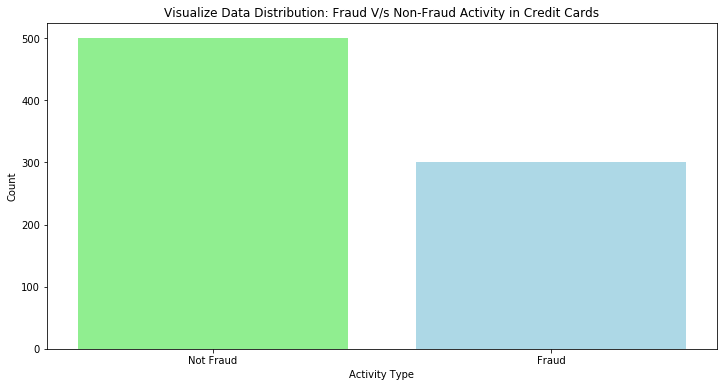

In [47]:
# Bar chart
import matplotlib.pyplot as plt
activity = activity_distribution['Activity']
count = activity_distribution['Count']
plt.figure(figsize=(12,6))
plt.bar(activity, count, color = ('lightgreen','lightblue'))
plt.title('Visualize Data Distribution: Fraud V/s Non-Fraud Activity in Credit Cards')
plt.xlabel("Activity Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

[Go Back](#back)

<a id='h3.2'></a>
### 3.2. Pie Chart to visualize data distribution b/w both classes

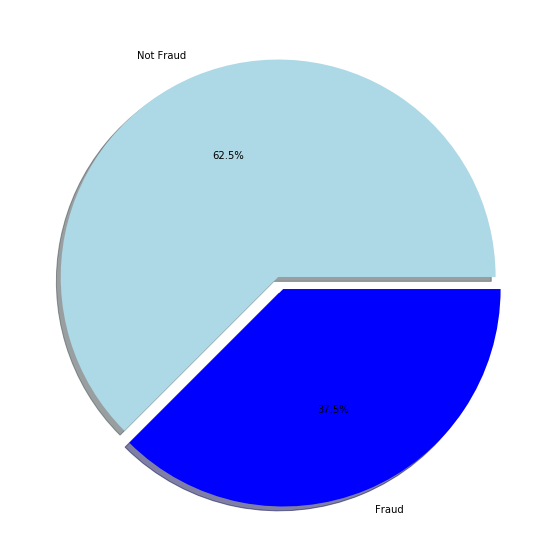

In [48]:
import numpy as np
count = activity_distribution['Count']
labels = activity_distribution['Activity']
colors = ['lightblue', 'blue']
explode = [0.01, 0.05]
plt.figure(figsize=(12,10))
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.pie(count, explode=explode, labels=labels, shadow = 'black', autopct = '%1.1f%%', colors = colors)

plt.show() 
#autopct='%1.1f%%',

[Go Back](#back)

<a id='h3.3'></a>
### 3.3. Donut Chart to visualize data distribution b/w both classes

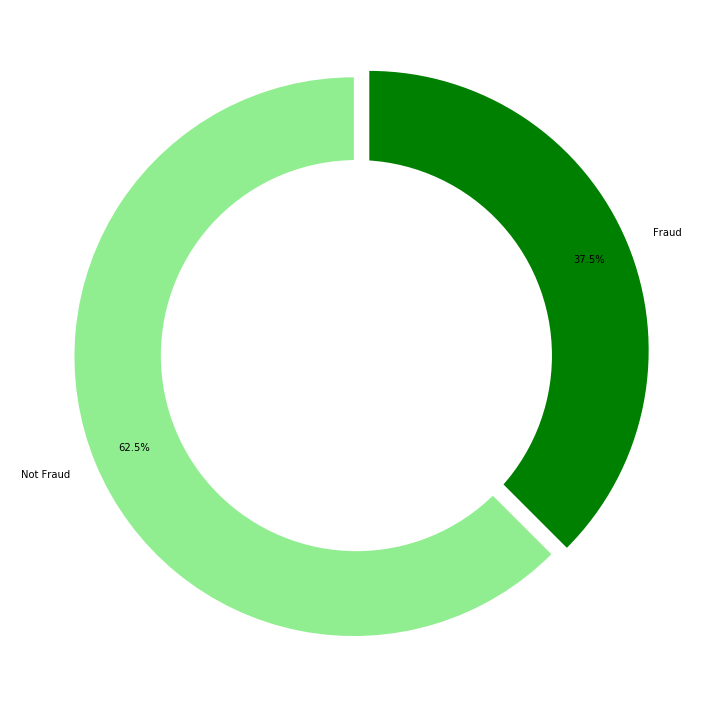

In [49]:
# Donut Chart
count = activity_distribution['Count']
labels = activity_distribution['Activity']
colors = ['lightgreen', 'green']
explode = [0.01, 0.05]
plt.figure(figsize=(12,10))
plt.pie(count, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode, labels = labels, colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

[Go Back](#back)

<a id='h3.4'></a>
### 3.4 Correlation of all features with target variable(Class)

In [54]:
credit_card_data_sample.corrwith(credit_card_data_sample.Class).sort_values(ascending=False)

Class     1.000000
V4        0.727029
V11       0.720429
V2        0.502832
V19       0.268541
V20       0.153327
V21       0.141182
Amount    0.087490
V27       0.085577
V28       0.073961
V8        0.055491
V26       0.048527
V22       0.005166
V25      -0.011297
V15      -0.022592
V23      -0.023171
V13      -0.043605
V24      -0.060981
Time     -0.177427
V6       -0.400462
V5       -0.419497
V1       -0.476931
V7       -0.508702
V18      -0.531133
V9       -0.586299
V3       -0.588365
V17      -0.619809
V16      -0.642228
V10      -0.659212
V12      -0.716632
V14      -0.771358
dtype: float64

[Go Back](#back)

<a id='h3.5'></a>
### 3.5 Visualize Correlation(Bar Chart)

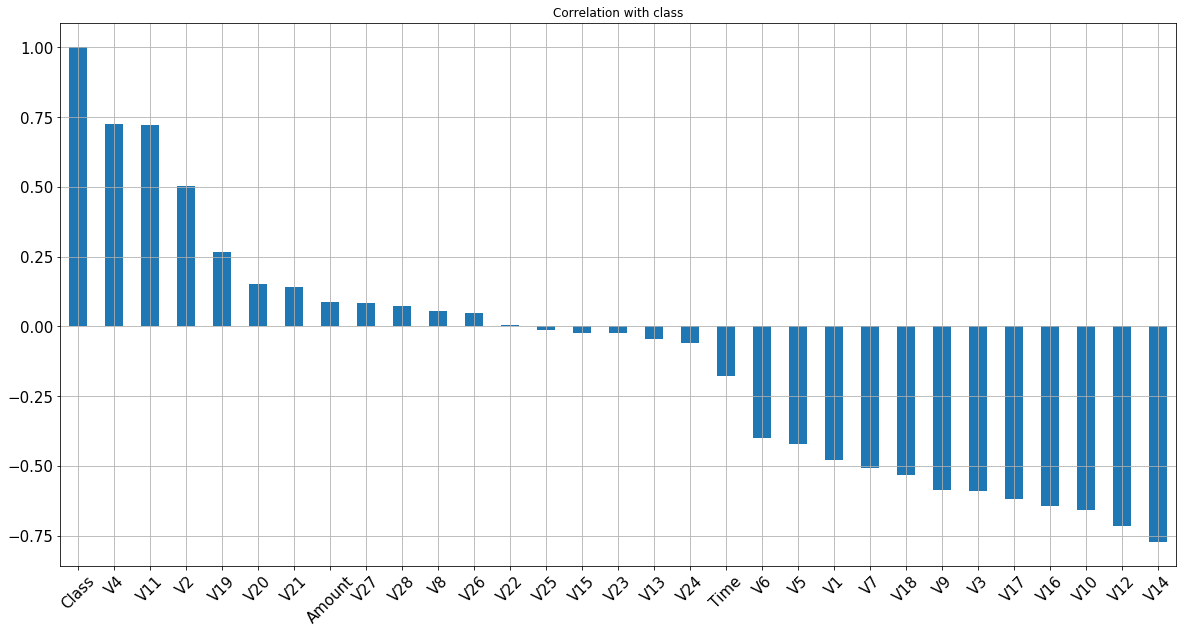

In [55]:
credit_card_data_sample.corrwith(credit_card_data_sample.Class).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

[Go Back](#back)

<a id='h3.6'></a>
### 3.6 Visualize Correlation(Heat Map)

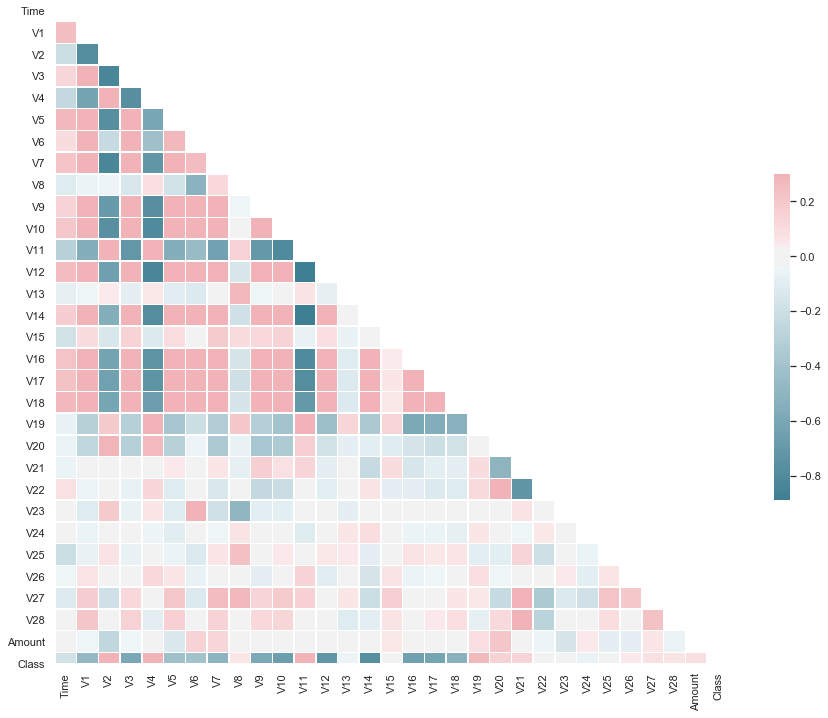

In [56]:
import seaborn as sns
sns.set(style="white")
corr = credit_card_data_sample.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76,1
1,79215.0,1.203027,-0.461918,0.863900,-0.766201,-1.103397,-0.376328,-0.711217,0.156305,1.953460,...,0.004980,0.255271,0.004632,0.073519,0.397002,-0.653881,0.104269,0.029959,1.00,0
2,49985.0,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,360.00,1
3,169032.0,-0.175824,1.101026,0.201848,-0.647132,0.397437,-1.112312,1.079160,-0.244948,0.027338,...,-0.282406,-0.528436,0.072211,0.056700,-0.413266,0.139874,0.361310,0.156958,8.07,0
4,70437.0,-0.749113,0.098600,2.511055,0.427296,-0.161521,0.734154,0.332122,0.382970,0.945279,...,-0.293914,-0.490446,0.041567,0.153824,-0.318076,-0.807108,-0.008660,-0.089769,39.90,0


[Go Back](#back)

<a id='h4'></a>
### 4- Feature Normalization

In [58]:
# Feature scaling of amount attribute
from sklearn.preprocessing import StandardScaler
credit_card_data_sample['normalizedAmount'] = StandardScaler().fit_transform(credit_card_data_sample['Amount'].values.reshape(-1,1))
credit_card_data_sample = credit_card_data_sample.drop(['Amount'],axis=1)

In [59]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1,-0.390398
1,79215.0,1.203027,-0.461918,0.863900,-0.766201,-1.103397,-0.376328,-0.711217,0.156305,1.953460,...,0.004980,0.255271,0.004632,0.073519,0.397002,-0.653881,0.104269,0.029959,0,-0.389463
2,49985.0,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1,1.007980
3,169032.0,-0.175824,1.101026,0.201848,-0.647132,0.397437,-1.112312,1.079160,-0.244948,0.027338,...,-0.282406,-0.528436,0.072211,0.056700,-0.413266,0.139874,0.361310,0.156958,0,-0.361943
4,70437.0,-0.749113,0.098600,2.511055,0.427296,-0.161521,0.734154,0.332122,0.382970,0.945279,...,-0.293914,-0.490446,0.041567,0.153824,-0.318076,-0.807108,-0.008660,-0.089769,0,-0.238041


[Go Back](#back)

<a id='h5'></a>
### 5- Data Selection

[Go Back](#back)

<a id='h5.1'></a>
### 5.1. Choosing Target Variable

In [60]:
# Now choose features and target variable
y = credit_card_data_sample.iloc[:, credit_card_data_sample.columns == 'Class']
y = y['Class'].ravel()
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

[Go Back](#back)

<a id='h5.2'></a>
### 5.2. Choosing Best subset of features

In [62]:
X1 = credit_card_data_sample[['V4', 'V11', 'V2', 'V19','V6', 'V5', 'V1', 'V18', 'V7', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]
X2 = credit_card_data_sample[['V4', 'V11', 'V2','V6', 'V5', 'V1', 'V18', 'V7', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]
X3 = credit_card_data_sample[['V4', 'V11', 'V2','V1', 'V18', 'V7', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]

X4 = credit_card_data_sample[['V4', 'V11', 'V2', 'V18', 'V7', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]

X5 = credit_card_data_sample[['V4', 'V11', 'V18', 'V7', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]


X6 = credit_card_data_sample[['V4', 'V11', 'V2', 'V9', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]

X7 = credit_card_data_sample[['V4', 'V11', 'V2', 'V17', 'V3',
                              'V16', 'V10','V12', 'V14' ]]

X8 = credit_card_data_sample[['V4', 'V11', 'V2', 'V19', 'V3',
                              'V16', 'V10','V12', 'V14' ]]

X9 = credit_card_data_sample[['V4', 'V11', 'V2','V16', 'V10','V12', 'V14' ]]

X10 = credit_card_data_sample[['V4', 'V11', 'V2','V10','V12', 'V14' ]]


In [63]:
print(len(X1.columns))
print(len(X2.columns))
print(len(X3.columns))
print(len(X4.columns))
print(len(X5.columns))
print(len(X6.columns))
print(len(X7.columns))
print(len(X8.columns))
print(len(X9.columns))
print(len(X10.columns))

16
15
13
12
11
10
9
9
7
6


In [64]:
# Make array of features
X = [X1, X2, X3, X4, X5, X6 ,X7, X8, X9, X10]

From the past experiance, we become to know that in Classification Algorithms, the best algorithms in terms of efficiency and accuracy are Random Forest and XG Boost, so we use both of them to make a model and then select the better one from both of them.

We use grid search to find best n_estimator in random forest

[Go Back](#back)

<a id='h1'></a>
## 6- Model Selection

[Go Back](#back)

<a id='h6.1'></a>
### 6.1. Random Forest Model

In [65]:
#Import Random Forest Model & grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

[Go Back](#back)

<a id='h6.1.1'></a>
#### 6.1.1. Grid Search on Random Forest

In [66]:
def find_best_params_RF(feature_subset, estimator, param_grid, cv):
    
    gs_rf_accuracy = GridSearchCV(estimator=estimator, 
                      param_grid=param_grid, 
                      cv=cv,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)
    
    
    grid_result_accuracy= gs_rf_accuracy.fit(feature_subset, y)
    



    
    return(dict({'accuracy_score':tuple([round(grid_result_accuracy.best_score_,2),
                                         grid_result_accuracy.best_params_])}))

In [67]:
params_rf = {'n_estimators':[100, 200, 300, 400, 500]
            }

In [68]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
feature = []
accuracy_scores = []
n_estimator = []
columns = []

for i in range(len(X)):
    
    result_dict =  find_best_params_RF(X[i], RandomForestClassifier(), params_rf, 10)
    print(features[i])
    print(result_dict)


    feature.append(features[i])
    columns.append(len(X[i].columns))
    n_estimator.append(result_dict['accuracy_score'][1]['n_estimators'])
    accuracy_scores.append(result_dict['accuracy_score'][0]) 
    
    
    

resulting_df = pd.DataFrame({'Feature': feature,
                             'Columns': columns,
                             'n_estimator': n_estimator,
                             'Accuracy Score': accuracy_scores
                            })

resulting_df


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


X1
{'accuracy_score': (0.94, {'n_estimators': 300})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


X2
{'accuracy_score': (0.94, {'n_estimators': 500})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


X3
{'accuracy_score': (0.94, {'n_estimators': 200})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.1s finished


X4
{'accuracy_score': (0.94, {'n_estimators': 300})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


X5
{'accuracy_score': (0.94, {'n_estimators': 300})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


X6
{'accuracy_score': (0.94, {'n_estimators': 100})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.1s finished


X7
{'accuracy_score': (0.94, {'n_estimators': 400})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.7s finished


X8
{'accuracy_score': (0.94, {'n_estimators': 100})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


X9
{'accuracy_score': (0.94, {'n_estimators': 100})}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.2s finished


X10
{'accuracy_score': (0.94, {'n_estimators': 200})}


,Feature,Columns,n_estimator,Accuracy Score
0,X1,16,300,0.94
1,X2,15,500,0.94
2,X3,13,200,0.94
3,X4,12,300,0.94
4,X5,11,300,0.94
5,X6,10,100,0.94
6,X7,9,400,0.94
7,X8,9,100,0.94
8,X9,7,100,0.94
9,X10,6,200,0.94


In [69]:
result = resulting_df[resulting_df['Accuracy Score'] == resulting_df['Accuracy Score'].max()]
result

,Feature,Columns,n_estimator,Accuracy Score
0,X1,16,300,0.94
1,X2,15,500,0.94
2,X3,13,200,0.94
3,X4,12,300,0.94
4,X5,11,300,0.94
5,X6,10,100,0.94
6,X7,9,400,0.94
7,X8,9,100,0.94
8,X9,7,100,0.94
9,X10,6,200,0.94


Now we find f1-score, roc-auc & log loss with the features of above df.

[Go Back](#back)

<a id='h6.1.2'></a>
#### 6.1.2. Cross Validation on Random Forest

In [70]:
from sklearn.model_selection import cross_val_score

In [74]:
# cross validation on Random Forest with features.
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
log_loss = []
variance = []
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
feature = []
columns = []
n_estimators = list(result['n_estimator'])
n_estimator = []


for i in range(len(X)):
    
    rf = RandomForestClassifier(n_estimators=n_estimators[i], oob_score = True,n_jobs = 1,random_state =1)
    
    accuracy_score = cross_val_score(rf, X[i], y, cv=10)

    f1_score = cross_val_score(rf, X[i], y, cv=10, scoring='f1')

    roc_auc_score = cross_val_score(rf, X[i], y, cv=10, scoring='roc_auc')

    loss = cross_val_score(rf, X[i], y, cv=10, scoring='neg_log_loss')



    accuracy_scores.append(round(accuracy_score.mean(),2))
    f1_scores.append(round(f1_score.mean(),2))
    roc_auc_scores.append(round(roc_auc_score.mean(),2))
    log_loss.append(round(loss.mean(),2))
    variance.append(round(accuracy_score.var(),2))
    feature.append(features[i])
    columns.append(len(X[i].columns))
    n_estimator.append(n_estimators[i])
        
                  
    
random_forest_result = pd.DataFrame({'Feature': feature,
                                     'Columns': columns,
                                     'n_estimator':n_estimator, 
                                     'Accuracy Score': accuracy_scores,
                                     'F1-Score': f1_scores,
                                     'roc-auc-score': roc_auc_scores,
                                     'Log Loss': log_loss,
                                     'Varaince': variance})

random_forest_result   

,Feature,Columns,n_estimator,Accuracy Score,F1-Score,roc-auc-score,Log Loss,Varaince
0,X1,16,300,0.94,0.91,0.97,-0.16,0.0
1,X2,15,500,0.94,0.92,0.97,-0.17,0.0
2,X3,13,200,0.94,0.92,0.97,-0.20,0.0
3,X4,12,300,0.94,0.92,0.97,-0.17,0.0
4,X5,11,300,0.94,0.92,0.97,-0.17,0.0
5,X6,10,100,0.94,0.91,0.97,-0.17,0.0
6,X7,9,400,0.94,0.92,0.97,-0.17,0.0
7,X8,9,100,0.94,0.92,0.98,-0.16,0.0
8,X9,7,100,0.94,0.92,0.97,-0.24,0.0
9,X10,6,200,0.94,0.92,0.97,-0.21,0.0


Its accuracy score and other matrics are  almost same, so we consider all result for testing.

[Go Back](#back)

<a id='h6.1.3'></a>
#### 6.1.3. Feature Importance

Now we extract features from random forest algo match those features that we extracted before(X1-X10)

In [128]:
# feature importance with random forest
x_train = credit_card_data_sample
x_train.drop('Class', axis=1, inplace = True)
rf = RandomForestClassifier(n_estimators=n_estimators[i], oob_score = True,
                            n_jobs = 1,random_state =1).fit(x_train, y)


KeyError: "['Class'] not found in axis"

In [84]:
feature_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

V14                 0.186795
V10                 0.134226
V4                  0.095525
V11                 0.092210
V17                 0.081062
V12                 0.065583
V16                 0.062658
V3                  0.038053
V7                  0.033218
V18                 0.022070
V19                 0.017180
V21                 0.016497
V2                  0.013675
V27                 0.012498
V20                 0.010858
V9                  0.010637
normalizedAmount    0.010447
V8                  0.010155
V1                  0.010109
V6                  0.009638
V28                 0.008849
V5                  0.008447
V26                 0.007780
V23                 0.007497
V13                 0.006934
V15                 0.006071
Time                0.005939
V25                 0.005584
V22                 0.005511
V24                 0.004296
dtype: float64

No handles with labels found to put in legend.


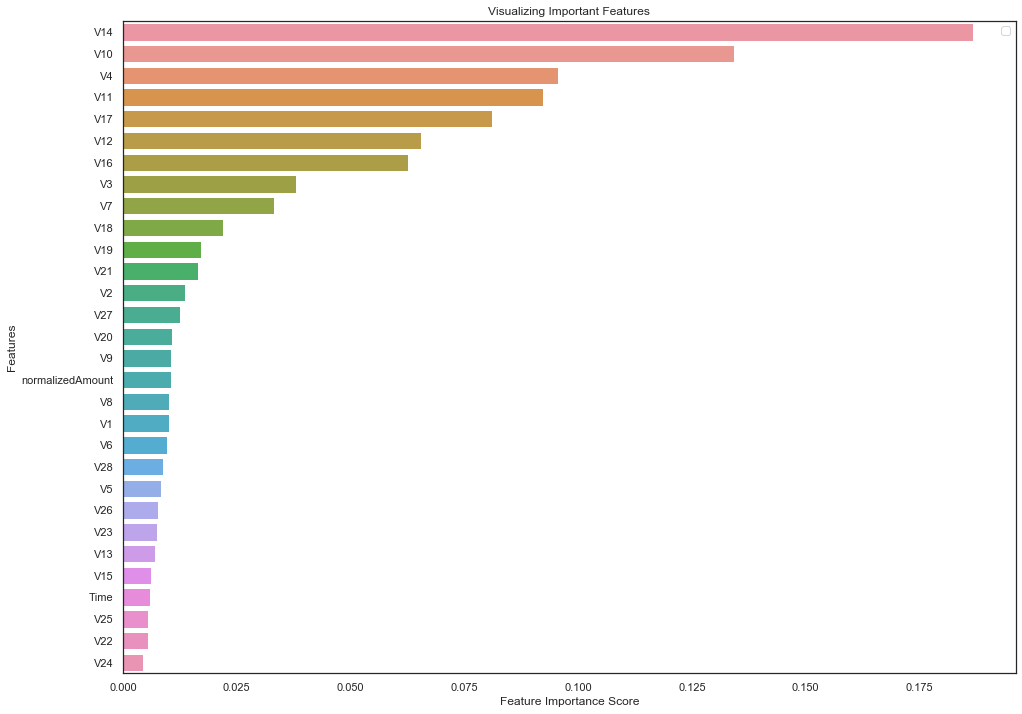

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize = (16,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [86]:
X11 = credit_card_data_sample[['V14', 'V10', 'V12', 'V11', 'V17', 'V4', 'V3', 'V16', 'V7']]
X12 = credit_card_data_sample[['V14', 'V10', 'V12', 'V11', 'V17', 'V4', 'V3', 'V16']]
X13 = credit_card_data_sample[['V14', 'V10', 'V12', 'V11', 'V17', 'V4', 'V3']]
X14 = credit_card_data_sample[['V14', 'V10', 'V12', 'V11', 'V17', 'V4']]
X15 = credit_card_data_sample[['V14', 'V10', 'V12', 'V11', 'V17']]
XX = [X11, X12, X13, X14, X15]

In [87]:
# Apply grid search from X11-X15

In [88]:
features = ['X11', 'X12', 'X13', 'X14', 'X15']
feature = []
accuracy_scores = []
n_estimator = []
columns = []

for i in range(len(XX)):
    
    result_dict =  find_best_params_RF(XX[i], RandomForestClassifier(), params_rf, 4)
    print(features[i])
    print(result_dict)


    feature.append(features[i])
    columns.append(len(XX[i].columns))
    n_estimator.append(result_dict['accuracy_score'][1]['n_estimators'])
    accuracy_scores.append(result_dict['accuracy_score'][0]) 
    
    
    

resulting_df = pd.DataFrame({'Feature': feature,
                             'Columns': columns,
                             'n_estimator': n_estimator,
                             'Accuracy Score': accuracy_scores
                            })

resulting_df


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   27.1s finished


X11
{'accuracy_score': (0.94, {'n_estimators': 100})}
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.1s finished


X12
{'accuracy_score': (0.94, {'n_estimators': 400})}
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.7s finished


X13
{'accuracy_score': (0.94, {'n_estimators': 400})}
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.4s finished


X14
{'accuracy_score': (0.94, {'n_estimators': 500})}
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.6s finished


X15
{'accuracy_score': (0.93, {'n_estimators': 200})}


,Feature,Columns,n_estimator,Accuracy Score
0,X11,9,100,0.94
1,X12,8,400,0.94
2,X13,7,400,0.94
3,X14,6,500,0.94
4,X15,5,200,0.93


Models consist of features X1 to X15 aren't giving score as good as previous were giving, So the best RF model with best subset of features are:

[Go Back](#back)

<a id='h6.1.4'></a>
#### 6.1.4 Selecting RF model with best hyperparameters

In [89]:
best_rf_model = random_forest_result
best_rf_model

,Feature,Columns,n_estimator,Accuracy Score,F1-Score,roc-auc-score,Log Loss,Varaince
0,X1,16,300,0.94,0.91,0.97,-0.16,0.0
1,X2,15,500,0.94,0.92,0.97,-0.17,0.0
2,X3,13,200,0.94,0.92,0.97,-0.20,0.0
3,X4,12,300,0.94,0.92,0.97,-0.17,0.0
4,X5,11,300,0.94,0.92,0.97,-0.17,0.0
5,X6,10,100,0.94,0.91,0.97,-0.17,0.0
6,X7,9,400,0.94,0.92,0.97,-0.17,0.0
7,X8,9,100,0.94,0.92,0.98,-0.16,0.0
8,X9,7,100,0.94,0.92,0.97,-0.24,0.0
9,X10,6,200,0.94,0.92,0.97,-0.21,0.0


Now we make all the models one by one and then test them on unseen data

[Go Back](#back)

<a id='h6.1.5'></a>
#### 6.1.5. Training & Testing Model

In [90]:
# read test data
test_data = pd.read_csv('ccfd test.csv')
test_data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,794,40454.0,-2.075068,1.946256,0.359796,-0.670179,-1.121972,-0.906134,-0.458877,1.397093,...,-0.063141,-0.322219,0.105865,0.538146,-0.108717,0.279875,0.131540,0.104954,1.00,0
1,550,63579.0,-0.698141,1.079751,1.162714,-0.406950,0.483764,0.269421,0.507068,0.264129,...,-0.223196,-0.506229,-0.079367,-0.687137,-0.148401,0.130467,0.386674,0.162655,7.17,0
2,786,167522.0,0.177886,1.041226,-1.983973,-0.422034,0.943027,-1.060097,1.062955,0.189106,...,0.245210,0.572771,0.043238,0.710972,-0.337609,0.493128,-0.173748,-0.053794,42.81,0
3,587,141452.0,0.027965,1.050715,-0.972674,-0.735826,1.360112,-1.779931,1.915047,-0.770688,...,0.163869,0.790801,-0.304403,0.001166,-0.464959,0.042318,-0.098679,0.009516,20.00,0
4,676,51556.0,0.416070,-1.056514,0.229999,1.818901,-1.065410,-0.130526,0.000117,0.138753,...,0.159900,-0.136355,-0.413966,0.459387,0.441326,-0.339634,-0.008037,0.102307,363.32,0


In [91]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [92]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40454.0,-2.075068,1.946256,0.359796,-0.670179,-1.121972,-0.906134,-0.458877,1.397093,-0.363615,...,-0.063141,-0.322219,0.105865,0.538146,-0.108717,0.279875,0.131540,0.104954,1.00,0
1,63579.0,-0.698141,1.079751,1.162714,-0.406950,0.483764,0.269421,0.507068,0.264129,-0.440619,...,-0.223196,-0.506229,-0.079367,-0.687137,-0.148401,0.130467,0.386674,0.162655,7.17,0
2,167522.0,0.177886,1.041226,-1.983973,-0.422034,0.943027,-1.060097,1.062955,0.189106,-0.709203,...,0.245210,0.572771,0.043238,0.710972,-0.337609,0.493128,-0.173748,-0.053794,42.81,0
3,141452.0,0.027965,1.050715,-0.972674,-0.735826,1.360112,-1.779931,1.915047,-0.770688,-0.066055,...,0.163869,0.790801,-0.304403,0.001166,-0.464959,0.042318,-0.098679,0.009516,20.00,0
4,51556.0,0.416070,-1.056514,0.229999,1.818901,-1.065410,-0.130526,0.000117,0.138753,0.729522,...,0.159900,-0.136355,-0.413966,0.459387,0.441326,-0.339634,-0.008037,0.102307,363.32,0


In [93]:
copied_df = test_data[:].copy()

In [94]:
x_test = copied_df[list(X1.columns)]   
x_test.head()

,V4,V11,V2,V19,V6,V5,V1,V18,V7,V9,V17,V3,V16,V10,V12,V14
0,-0.670179,0.726349,1.946256,-0.083631,-0.906134,-1.121972,-2.075068,-0.050066,-0.458877,-0.363615,0.033296,0.359796,0.459915,-0.538909,1.262218,0.949394
1,-0.406950,0.953243,1.079751,0.173499,0.269421,0.483764,-0.698141,-0.114959,0.507068,-0.440619,-0.632817,1.162714,0.277062,0.118207,0.582655,0.227597
2,-0.422034,0.743230,1.041226,-0.094098,-1.060097,0.943027,0.177886,0.509350,1.062955,-0.709203,0.595075,-1.983973,0.172097,-0.904233,0.230151,-0.100488
3,-0.735826,-0.699676,1.050715,-0.127028,-1.779931,1.360112,0.027965,0.064565,1.915047,-0.066055,0.648857,-0.972674,-0.565416,-0.898252,-0.527027,-0.829866
4,1.818901,1.003205,-1.056514,-0.037644,-0.130526,-1.065410,0.416070,0.873217,0.000117,0.729522,0.809179,0.229999,0.204820,-0.635645,0.357223,-0.898184


In [95]:
y_test = test_data['Class']
y_test[:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [96]:
print(len(x_test))
print(len(y_test))

500
500


In [97]:
# x_train & y_train
x_train = X1
y_train = y
print(len(x_train))
print(len(y_train))

800
800


In [98]:
clf=RandomForestClassifier(n_estimators=400, oob_score = True,n_jobs = 1,random_state =1)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
                       oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [99]:
y_pred=clf.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [100]:
from sklearn import metrics
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.95


In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
n_estimators = list(best_rf_model['n_estimator'])
accuracy_score = []
f1_score = []
roc_auc_score = []
log_loss = []
confusion_matrices = []

for i in range(len(X)):
    x_train = X[i]
    x_test = copied_df[list(X[i].columns)] 
    clf=RandomForestClassifier(n_estimators=n_estimators[i], oob_score = True,n_jobs = 1,random_state =1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy_score.append(round(metrics.accuracy_score(y_test, y_pred),2))
    f1_score.append(round(metrics.f1_score(y_test, y_pred),2))
    roc_auc_score.append(round(metrics.roc_auc_score(y_test, y_pred),2))
    log_loss.append(round(metrics.log_loss(y_test, y_pred),2))
    confusion_matrices.append(confusion_matrix(y_test, y_pred, labels=[1,0]))
    
    
test_data_result = pd.DataFrame({'Features': features,
                                'n_estimators': n_estimators,
                                'Accuracy Score': accuracy_score,
                                'F1-Score': f1_score,
                                'roc_auc_score': roc_auc_score,
                                'Log Loss': log_loss,
                                'Confusion Matrix': confusion_matrices})

test_data_result

,Features,n_estimators,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X1,300,0.95,0.94,0.94,1.66,"[[175, 17], [7, 301]]"
1,X2,500,0.95,0.93,0.94,1.73,"[[172, 20], [5, 303]]"
2,X3,200,0.95,0.93,0.94,1.73,"[[173, 19], [6, 302]]"
3,X4,300,0.95,0.93,0.94,1.80,"[[174, 18], [8, 300]]"
4,X5,300,0.95,0.94,0.94,1.66,"[[174, 18], [6, 302]]"
5,X6,100,0.95,0.93,0.94,1.80,"[[172, 20], [6, 302]]"
6,X7,400,0.95,0.94,0.94,1.66,"[[175, 17], [7, 301]]"
7,X8,100,0.96,0.94,0.95,1.45,"[[176, 16], [5, 303]]"
8,X9,100,0.95,0.94,0.94,1.66,"[[174, 18], [6, 302]]"
9,X10,200,0.95,0.93,0.94,1.73,"[[174, 18], [7, 301]]"


[Go Back](#back)

<a id='h6.1.6'></a>
#### 6.1.6. Finalize Best Model

Best result is with feature X8

In [107]:
best_rf_model_result = test_data_result.loc[[7]]
best_rf_model_result.reset_index(inplace = True)
best_rf_model_result.drop('index', axis=1,inplace=True)
best_rf_model_result

,Features,n_estimators,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X8,100,0.96,0.94,0.95,1.45,"[[176, 16], [5, 303]]"


[Go Back](#back)

<a id='h6.1.7'></a>
#### 6.1.7. Plot Confusion Matrix of Best RF Model 

Plot confusion matrix

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(len(classes))

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[176  16]
 [  5 303]]
2


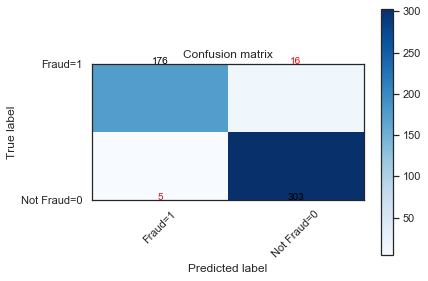

In [109]:
# Compute confusion matrix
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(best_rf_model_result['Confusion Matrix'][0], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

[Go Back](#back)

<a id='h6.2'></a>
### 6.2. XGBoost

[Go Back](#back)

In [116]:
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier 

<a id='h6.2.1'></a>
#### 6.2.1. Grid Search on XGB

In [117]:
def find_best_params_xgb(feature_subset, estimator, param_grid, cv):
    
    gs_xgb_accuracy = GridSearchCV(estimator=estimator, 
                      param_grid=param_grid, 
                      cv=cv,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)
    
    
    grid_result_accuracy= gs_xgb_accuracy.fit(feature_subset, y)
    



    
    return(dict({'accuracy_score':tuple([round(grid_result_accuracy.best_score_,2),
                                         grid_result_accuracy.best_params_])}))

In [118]:
import numpy as np
col_sample_tree_ranges = np.arange(0,1.1,0.1)

params_xgb = {
              'objective':['binary:logistic'],
              'colsample_bytree':col_sample_tree_ranges,
              'learning_rate': [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5],
              'max_depth': [3,4,5,6,7,8,9,10],
              'alpha':[10]
              
              
              
            }    

In [121]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
feature = []
accuracy_scores = []
columns = []
other_matrices = []

for i in range(len(X)):
    
    result_dict =  find_best_params_xgb(X[i], XGBClassifier(), params_xgb, 4)
    print(features[i])
    print(result_dict)


    feature.append(features[i])
    columns.append(len(X[i].columns))
    accuracy_scores.append(result_dict['accuracy_score'][0]) 
    #other_matrices.append(result_dict[1])
    
    
    

resulting_df = pd.DataFrame({'Feature': feature,
                             'Columns': columns,
                             'Accuracy Score': accuracy_scores
                            })

resulting_df


Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

if we applying cross validation on all subset of data, it is taking so much time, so first we reduce the number of subset of features.

So now we extract most relevant features from XGBoost algo

[Go Back](#back)

<a id='h6.2.2'></a>
#### 6.2.2. Feature Importance

In [133]:
result_dict =  find_best_params_xgb(x_train, XGBClassifier(), params_xgb, 4)

Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed: 12.6min finished


In [134]:
result_dict

{'accuracy_score': (0.95,
  {'alpha': 10,
   'colsample_bytree': 0.1,
   'learning_rate': 0.3,
   'max_depth': 9,
   'objective': 'binary:logistic'})}

In [135]:
# feature importance with XGB
xgb = XGBClassifier(n_estimators=300, oob_score = True,
                    n_jobs = 1,random_state =1,
                    objective = 'binary:logistic',
                    colsample_bytree = 0.1,
                    learning_rate = 0.3,
                    max_depth = 9,
                    alpha = 10).fit(x_train, y)


In [132]:
x_train.columns

30

In [136]:
feature_imp = pd.Series(xgb.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

V11                 0.237977
V3                  0.131686
V9                  0.121058
V14                 0.115589
V4                  0.061497
V19                 0.033723
V17                 0.031720
V21                 0.025525
Time                0.023214
normalizedAmount    0.022393
V2                  0.018282
V22                 0.017806
V13                 0.016863
V20                 0.016469
V5                  0.016232
V1                  0.015532
V26                 0.012465
V16                 0.011520
V10                 0.009659
V25                 0.008509
V27                 0.008373
V15                 0.006265
V23                 0.005942
V7                  0.005822
V24                 0.005815
V18                 0.005228
V28                 0.004392
V6                  0.004017
V8                  0.003924
V12                 0.002504
dtype: float32

No handles with labels found to put in legend.


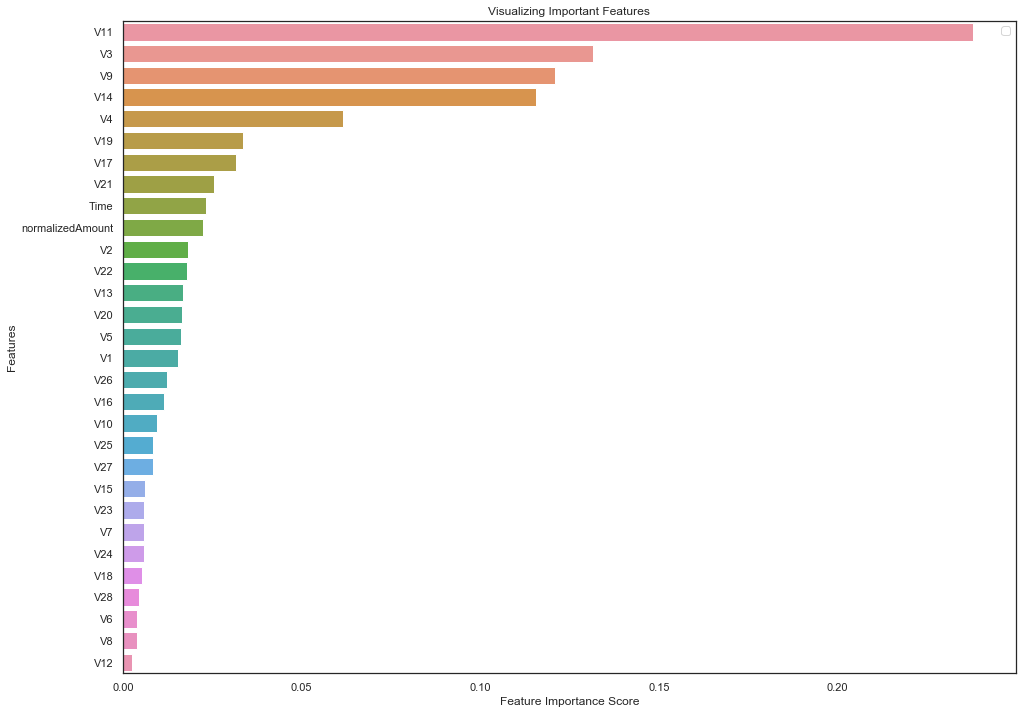

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize = (16,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [139]:
feature_imp.index

Index(['V11', 'V3', 'V9', 'V14', 'V4', 'V19', 'V17', 'V21', 'Time',
       'normalizedAmount', 'V2', 'V22', 'V13', 'V20', 'V5', 'V1', 'V26', 'V16',
       'V10', 'V25', 'V27', 'V15', 'V23', 'V7', 'V24', 'V18', 'V28', 'V6',
       'V8', 'V12'],
      dtype='object')

[Go Back](#back)

<a id='h6.2.3'></a>
#### 6.2.3. Selecting Best Features for XGB

In [153]:
X11 = x_train[['V11', 'V3', 'V9', 'V14', 'V4', 'V19', 'V17', 'V21', 'Time',
       'normalizedAmount', 'V2', 'V22', 'V13', 'V20', 'V5', 'V1']]

X12 = x_train[['V11', 'V3', 'V9', 'V14', 'V4', 'V19', 'V17', 'V21', 'Time',
       'normalizedAmount', 'V2']]

X13 = x_train[['V11', 'V3', 'V9', 'V14', 'V4', 'V19', 'V17', 'V21', 'Time']]

X14 = x_train[['V11', 'V3', 'V9', 'V14', 'V4', 'V19', 'V17']]

X15 = x_train[['V11', 'V3', 'V9', 'V14', 'V4']]

X16 = x_train[['V11', 'V3', 'V9', 'V14']]

XX = [X11, X12, X13, X14, X15, X16]

In [154]:
# Apply grid search from X11-X16

In [141]:
for i in range(len(XX)):
    result_dict = find_best_params_xgb(XX[i], XGBClassifier(), params_xgb, 4)
    print(result_dict)

Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  8.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.30000000000000004, 'learning_rate': 0.1, 'max_depth': 4, 'objective': 'binary:logistic'})}
Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 4, 'objective': 'binary:logistic'})}
Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  9.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 3, 'objective': 'binary:logistic'})}
Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  8.4min finished


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.30000000000000004, 'learning_rate': 0.1, 'max_depth': 8, 'objective': 'binary:logistic'})}
Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  9.5min finished


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.0001, 'max_depth': 6, 'objective': 'binary:logistic'})}
Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'accuracy_score': (0.94, {'alpha': 10, 'colsample_bytree': 0.5, 'learning_rate': 0.0001, 'max_depth': 5, 'objective': 'binary:logistic'})}


[Parallel(n_jobs=1)]: Done 2816 out of 2816 | elapsed:  9.0min finished


So they all are giving 0.94 accuracy

We choose subset X13, X14, X15, X16 and apply n_estimators(100,200,300,400,500) on it.and make its DF by applying cross validation on it.  

[Go Back](#back)

<a id='h6.2.4'></a>
#### 6.2.4. Cross Validation on Random Forest

In [204]:
alpha = 10
colsample_bytree = [0.4,0.3, 0.6,0.5]
colsample_bytrees = []
learning_rate = [0.1,0.1,0.0001,0.0001]
learning_rates = []
max_depth = [3,8,6,5]
max_depths = []
n_estimator = [100,200,300,400,500]
n_estimators = []
features = ['X13', 'X14','X15', 'X16']
XXX = [X13, X14, X15, X16]
feature = []
accuracy_scores = []
variance = []
f1_scores = []
roc_auc_scores = []
log_loss = []
columns = []

for i in range(len(XXX)):
    
    for j in range(len(n_estimator)):
        
        xgb = XGBClassifier(n_estimators=n_estimator[j], oob_score = True,
                    n_jobs = 1,random_state =1,
                    objective = 'binary:logistic',
                    colsample_bytree = colsample_bytree[i],
                    learning_rate = learning_rate[i],
                    max_depth = max_depth[i],
                    alpha = 10).fit(x_train, y)
        
        accuracy_score = cross_val_score(xgb, XXX[i], y, cv=4)
        
        f1_score = cross_val_score(xgb, XXX[i], y, cv=10, scoring='f1')

        roc_auc_score = cross_val_score(xgb, XXX[i], y, cv=10, scoring='roc_auc')

        loss = cross_val_score(xgb, XXX[i], y, cv=10, scoring='neg_log_loss')

        
        
        accuracy_scores.append(round(accuracy_score.mean(),2))
        variance.append(round(accuracy_score.var(),2))
        f1_scores.append(round(f1_score.mean(),2))
        roc_auc_scores.append(round(roc_auc_score.mean(),2))
        log_loss.append(round(loss.mean(),2))

        
        colsample_bytrees.append(colsample_bytree[i])
        learning_rates.append(learning_rate[i])
        max_depths.append(max_depth[i])
        n_estimators.append(n_estimator[j])
        feature.append(features[i])
        columns.append(len(XXX[i].columns))
        
        
xgb_classifier_result = pd.DataFrame({'Feature': feature,
                                      'Columns': columns,
                                      'colsample_bytree' : colsample_bytrees,
                                      'learning_rate': learning_rates,
                                      'max depth': max_depths,
                                      'n_estimator': n_estimators,
                                      'Accuracy Score': accuracy_scores,
                                      'F1-Score': f1_scores,
                                      'roc-auc-score': roc_auc_scores,
                                      'Log Loss': log_loss,
                                      'Varaince': variance})

xgb_classifier_result

,Feature,Columns,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc-auc-score,Log Loss,Varaince
0,X13,9,0.4,0.1000,3,100,0.94,0.91,0.98,-0.16,0.0
1,X13,9,0.4,0.1000,3,200,0.93,0.91,0.98,-0.18,0.0
2,X13,9,0.4,0.1000,3,300,0.93,0.90,0.98,-0.20,0.0
3,X13,9,0.4,0.1000,3,400,0.93,0.90,0.98,-0.21,0.0
4,X13,9,0.4,0.1000,3,500,0.93,0.90,0.98,-0.23,0.0
5,X14,7,0.3,0.1000,8,100,0.94,0.91,0.97,-0.19,0.0
6,X14,7,0.3,0.1000,8,200,0.93,0.91,0.97,-0.21,0.0
7,X14,7,0.3,0.1000,8,300,0.93,0.91,0.97,-0.22,0.0
8,X14,7,0.3,0.1000,8,400,0.93,0.90,0.97,-0.23,0.0
9,X14,7,0.3,0.1000,8,500,0.93,0.90,0.97,-0.24,0.0


[Go Back](#back)

<a id='h6.2.5'></a>
#### 6.2.5 Selecting XGB model with best hyperparameters

Now we choose result with best hyperparameters and features

In [167]:
xgb_classifier_result.loc[[0,1,5,14]]

,Feature,Columns,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc-auc-score,Log Loss,Varaince
0,X13,9,0.4,0.1000,3,100,0.94,0.91,0.98,-0.16,0.0
1,X13,9,0.4,0.1000,3,200,0.93,0.91,0.98,-0.18,0.0
5,X14,7,0.3,0.1000,8,100,0.94,0.91,0.97,-0.19,0.0
14,X15,5,0.6,0.0001,6,500,0.94,0.92,0.96,-0.66,0.0


In [178]:
best_xgb_classifier = xgb_classifier_result.loc[[0,5,14]]
best_xgb_classifier

,Feature,Columns,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc-auc-score,Log Loss,Varaince
0,X13,9,0.4,0.1000,3,100,0.94,0.91,0.98,-0.16,0.0
5,X14,7,0.3,0.1000,8,100,0.94,0.91,0.97,-0.19,0.0
14,X15,5,0.6,0.0001,6,500,0.94,0.92,0.96,-0.66,0.0


[Go Back](#back)

<a id='h6.2.6'></a>
#### 6.2.6. Training & Testing

Now train above 3 models on training data and test the model on unseen data and check the result

In [187]:
features = list(best_xgb_classifier['Feature'])
feature = []
XXX = [X13, X14, X15]
colsample_bytree = list(best_xgb_classifier['colsample_bytree'])
colsample_bytrees = []
learning_rate = list((best_xgb_classifier['learning_rate']))
learning_rates = []
max_depth = list(best_xgb_classifier['max depth'])
max_depths = []
n_estimator = list(best_xgb_classifier['n_estimator'])
n_estimators = []


columns = []
accuracy_score = []
f1_score = []
roc_auc_score = []
log_loss = []
confusion_matrices = []

for i in range(len(XXX)):
    
    x_train = XXX[i]
    x_test = test_data[list(XXX[i].columns)] 
    xgb = XGBClassifier(n_estimators=n_estimator[i], oob_score = True,
                    n_jobs = 1,random_state =1,
                    objective = 'binary:logistic',
                    colsample_bytree = colsample_bytree[i],
                    learning_rate = learning_rate[i],
                    max_depth = max_depth[i],
                    alpha = 10)
    
    xgb.fit(x_train,y_train)
    y_pred=xgb.predict(x_test)
    
    
    
    accuracy_score.append(round(metrics.accuracy_score(y_test, y_pred),2))
    f1_score.append(round(metrics.f1_score(y_test, y_pred),2))
    roc_auc_score.append(round(metrics.roc_auc_score(y_test, y_pred),2))
    log_loss.append(round(metrics.log_loss(y_test, y_pred),2))
    confusion_matrices.append(confusion_matrix(y_test, y_pred, labels=[1,0]))
    
    colsample_bytrees.append(colsample_bytree[i])
    learning_rates.append(learning_rate[i])
    max_depths.append(max_depth[i])
    n_estimators.append(n_estimator[i])
    feature.append(features[i])
    
    
test_data_result = pd.DataFrame({'Features': feature,
                                 
                                  'colsample_bytree' : colsample_bytrees,
                                  'learning_rate': learning_rates,
                                  'max depth': max_depths,
                                  'n_estimator': n_estimators,
                                'Accuracy Score': accuracy_score,
                                'F1-Score': f1_score,
                                'roc_auc_score': roc_auc_score,
                                'Log Loss': log_loss,
                                'Confusion Matrix': confusion_matrices})

test_data_result

,Features,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X13,0.4,0.1000,3,100,0.96,0.94,0.95,1.52,"[[175, 17], [5, 303]]"
1,X14,0.3,0.1000,8,100,0.95,0.94,0.94,1.59,"[[173, 19], [4, 304]]"
2,X15,0.6,0.0001,6,500,0.94,0.92,0.93,2.00,"[[166, 26], [3, 305]]"


[Go Back](#back)

<a id='h6.2.7'></a>
#### 6.2.7. Finalize Best Model

Best result is with feature X13 & X14

In [188]:
best_xgb_model_result = test_data_result.loc[[0, 1]]
best_xgb_model_result

,Features,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X13,0.4,0.1,3,100,0.96,0.94,0.95,1.52,"[[175, 17], [5, 303]]"
1,X14,0.3,0.1,8,100,0.95,0.94,0.94,1.59,"[[173, 19], [4, 304]]"


[Go Back](#back)

<a id='h6.2.8'></a>
#### 6.2.8 Plot Confusion Matrix of Best XGB Model 

plot its confusion matrix

Confusion matrix, without normalization
[[175  17]
 [  5 303]]
2


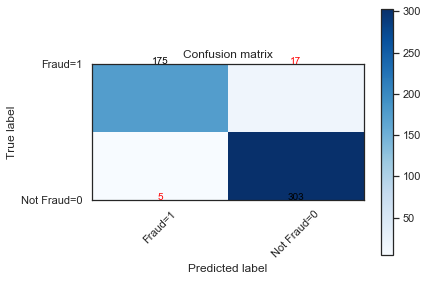

In [190]:
# Compute confusion matrix
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(best_xgb_model_result['Confusion Matrix'][0], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[173  19]
 [  4 304]]
2


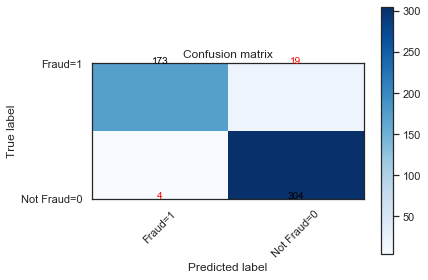

In [191]:
plot_confusion_matrix(best_xgb_model_result['Confusion Matrix'][1], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

[Go Back](#back)

<a id='h7'></a>
## 7- Summerize Models with their results

In the end, we have finalized 3 models that are giving best results, 1 related to random forest and other 2 belogs to XGBoost,
they are given below

In [193]:
# Random Forest model
best_rf_model_result

,Features,n_estimators,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X8,100,0.96,0.94,0.95,1.45,"[[176, 16], [5, 303]]"


Confusion matrix, without normalization
[[176  16]
 [  5 303]]
2


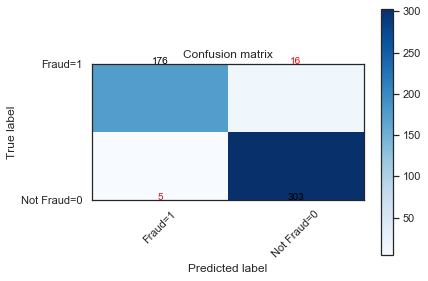

In [195]:
# Confusion matrix of selected random forest model
plot_confusion_matrix(best_rf_model_result['Confusion Matrix'][0], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

In [194]:
# XGB Model
best_xgb_model_result

,Features,colsample_bytree,learning_rate,max depth,n_estimator,Accuracy Score,F1-Score,roc_auc_score,Log Loss,Confusion Matrix
0,X13,0.4,0.1,3,100,0.96,0.94,0.95,1.52,"[[175, 17], [5, 303]]"
1,X14,0.3,0.1,8,100,0.95,0.94,0.94,1.59,"[[173, 19], [4, 304]]"


Confusion matrix, without normalization
[[175  17]
 [  5 303]]
2


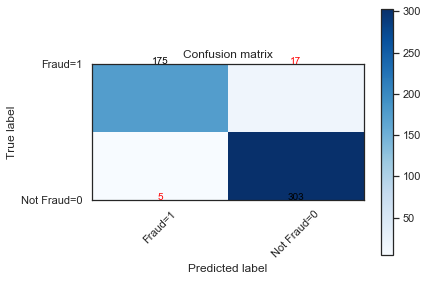

In [196]:
# Confusion matrix of selected random forest model1
plot_confusion_matrix(best_xgb_model_result['Confusion Matrix'][0], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[173  19]
 [  4 304]]
2


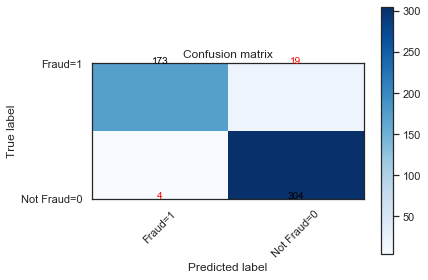

In [197]:
# Confusion matrix of selected random forest model2
plot_confusion_matrix(best_xgb_model_result['Confusion Matrix'][1], classes=['Fraud=1','Not Fraud=0'],normalize= False,  title='Confusion matrix')

[Go Back](#back)

<a id='h8'></a>
#  End of the Project

So in this binary classification project named <b>"Credit Card Fraud Detection"</b> the best model is <b>Random forest</b>, that is giving <br>
<b>Accuracy Score</b>: 0.96<br>
<b> F1-Score</b>: 0.94<br>
<b> roc-auc Score</b>: 0.95<br>
<b>Log Loss</b>:1.45